In [3]:
!adb devices

List of devices attached
* daemon not running. starting it now on port 5037 *
* daemon started successfully *
TA06809MT3	device



In [63]:
!echo $AP_PORT

9999


In [109]:
import android

In [110]:
!adb forward tcp:9999 tcp:3333

In [111]:
d = android.Android()

In [113]:
%store d

com.googlecode.android_scripting.rpc.RpcError: Unknown RPC.
com.googlecode.android_scripting.rpc.RpcError: Unknown RPC.
Stored 'd' (Android)


In [43]:
d.ttsSpeak('Hola mundo')

Result(id=115, result=None, error=None)

In [80]:
d.startSensingTimed(2,1000)

Result(id=36, result=None, error=None)

In [81]:
d.sensorsReadAccelerometer()

Result(id=37, result=[-0.1176798, -0.1569064, 9.92433], error=None)

In [35]:
for i in range(15):
    print d.sensorsReadAccelerometer()

Result(id=2, result=[-0.1176798, -0.19613299, 9.92433], error=None)
Result(id=3, result=[-0.1176798, -0.2353596, 10.042009], error=None)
Result(id=4, result=[-0.1176798, -0.2353596, 10.042009], error=None)
Result(id=5, result=[-0.19613299, -0.2745862, 9.885103], error=None)
Result(id=6, result=[-0.19613299, -0.2745862, 9.885103], error=None)
Result(id=7, result=[-0.0784532, -0.19613299, 10.081236], error=None)
Result(id=8, result=[-0.0784532, -0.19613299, 10.081236], error=None)
Result(id=9, result=[-0.0784532, -0.0784532, 9.92433], error=None)
Result(id=10, result=[-0.0784532, -0.0784532, 9.92433], error=None)
Result(id=11, result=[0.0392266, -0.1176798, 10.002783], error=None)
Result(id=12, result=[0.0392266, -0.1176798, 10.002783], error=None)
Result(id=13, result=[-0.0392266, -0.1569064, 10.159689], error=None)
Result(id=14, result=[-0.0392266, -0.1569064, 10.159689], error=None)
Result(id=15, result=[-0.0392266, -0.1569064, 10.042009], error=None)
Result(id=16, result=[-0.0392266,

In [82]:
aceleracion = []
tiempoCensado = 0;
tiempoTotal = 3000;

d.startSensingTimed(2,1000)
while tiempoCensado <= tiempoTotal:
    aceleracion.append(d.sensorsReadAccelerometer().result)
    tiempoCensado += 100
d.stopSensing();

java.lang.RuntimeException: SensorListener was already launched,close it first.


In [42]:
aceleracion

[[-5.491724, -3.80498, 20.51551],
 [-5.491724, -3.80498, 20.51551],
 [-5.491724, -3.80498, 20.51551],
 [-5.570177, -4.864098, 21.653082],
 [-5.570177, -4.864098, 21.653082],
 [-5.570177, -4.864098, 21.653082],
 [-5.3348174, -5.64863, 22.280708],
 [-5.3348174, -5.64863, 22.280708],
 [-5.3348174, -5.64863, 22.280708],
 [-4.864098, -6.3154826, 22.516068],
 [-4.864098, -6.3154826, 22.516068],
 [-4.864098, -6.3154826, 22.516068],
 [-4.864098, -6.3154826, 22.516068],
 [-4.4326057, -6.5116153, 22.202255],
 [-4.4326057, -6.5116153, 22.202255],
 [-3.9618864, -6.590069, 21.45695],
 [-3.9618864, -6.590069, 21.45695],
 [-3.9618864, -6.590069, 21.45695],
 [-3.9618864, -6.590069, 21.45695],
 [-3.216581, -5.8055367, 18.867994],
 [-2.7850885, -5.0994577, 17.338158],
 [-2.7850885, -5.0994577, 17.338158],
 [-2.3143694, -4.393379, 15.6906395],
 [-2.3143694, -4.393379, 15.6906395],
 [-2.3143694, -4.393379, 15.6906395],
 [-1.8044236, -3.80498, 13.925443],
 [-1.2160245, -3.1773546, 12.395605],
 [-1.2160245,

In [44]:
import pandas as pd

In [45]:
%matplotlib inline

In [47]:
acel = pd.DataFrame(aceleracion, columns=["x", "y", "z"])

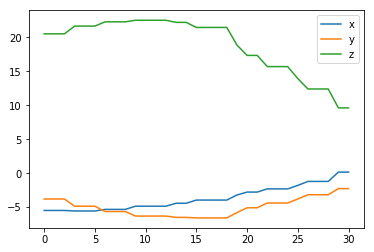

In [48]:
acel.plot()

Vamos a crear una función para ejecutar la gráfica de aceleración

In [50]:
import pandas as pd
import time
%matplotlib inline

def capturaDatosAceleracion():
    """
        Una función simple que registra las lecturas del acelerómetro y las guarda en un dataFrame de pandas
    """
    aceleracion = []
    tiempoCensado = 0.
    tiempoTotal = 3000
    d.startSensingTimed(2,1000)
    while tiempoCensado <= tiempoTotal:
        aceleracion.append(d.sensorsReadAccelerometer().result)
        time.sleep(100/1000.00)
        tiempoCensado += 100
    d.stopSensing()
    
    return pd.DataFrame(aceleracion, columns=["Ax", "Ay", "Az"])

In [108]:
capturaDatosAceleracion().plot()

error: [Errno 32] Broken pipe

In [83]:
d.stopSensing();

In [107]:
d

In [104]:
%store -r

In [106]:
%store d

error: [Errno 32] Broken pipe